### Clustering en Python

In [2]:
import pandas as pd
import os

In [3]:
data= pd.read_csv("winequality-red.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

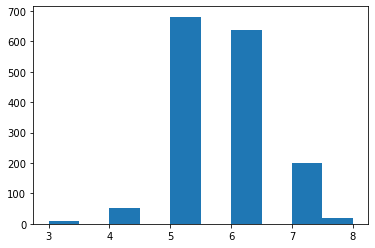

In [3]:
import matplotlib.pyplot as plt
plt.hist(data["quality"])

In [4]:
data.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [5]:
df_norm = (data-data.min())/(data.max()-data.min())

In [6]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


### Clustering jerarquico scikit -learn

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
cluss= AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [9]:
md_h= pd.Series(cluss.labels_)
md_h

0       2
1       2
2       2
3       3
4       2
       ..
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64

Text(0, 0.5, 'Numero de vinos del cluster')

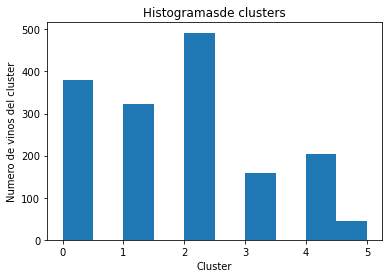

In [10]:
plt.hist(md_h)
plt.title("Histogramasde clusters")
plt.xlabel("Cluster")
plt.ylabel("Numero de vinos del cluster")

In [11]:
cluss.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
z= linkage(df_norm, "ward")

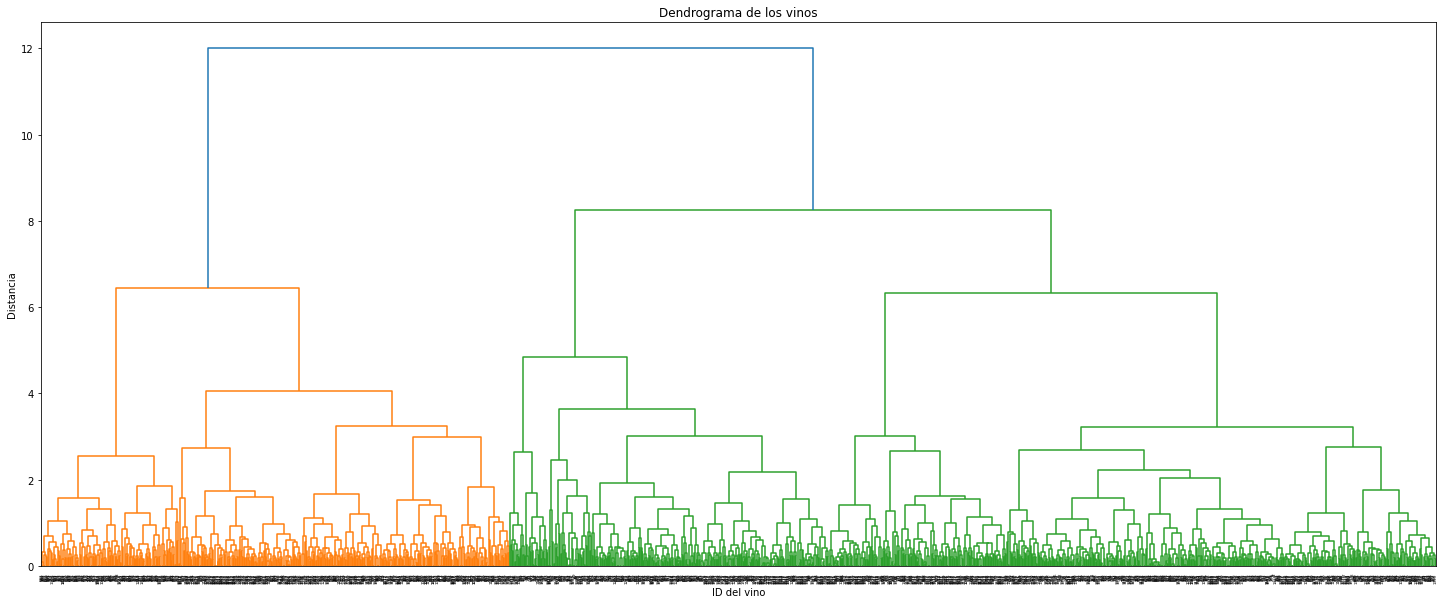

In [14]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(z, leaf_rotation=90., leaf_font_size=4.)
plt.show()

# K- Means

In [15]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [16]:
model= KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [17]:
model.labels_

array([1, 1, 1, ..., 5, 1, 0])

In [18]:
md_k= pd.Series(model.labels_)

In [19]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [20]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,3
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1


(array([232.,   0., 369.,   0., 291.,   0., 219.,   0., 270., 218.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

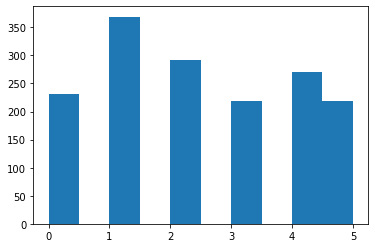

In [21]:
plt.hist(md_k)

In [22]:
model.cluster_centers_

array([[0.36946903, 0.15456719, 0.43349138, 0.10702055, 0.10525445,
        0.1657965 , 0.08396795, 0.40450782, 0.41277491, 0.24001136,
        0.50537135, 0.71465517],
       [0.23922584, 0.38342243, 0.0698645 , 0.09359803, 0.12066181,
        0.16502538, 0.10625604, 0.48209631, 0.52262979, 0.15380621,
        0.2352651 , 0.42926829],
       [0.33260347, 0.27920962, 0.28003436, 0.08673445, 0.13823727,
        0.13881225, 0.12947919, 0.51759591, 0.41112644, 0.18667819,
        0.20925192, 0.48041237],
       [0.59473876, 0.20171076, 0.54789954, 0.13298305, 0.16580907,
        0.14438228, 0.09551931, 0.65897921, 0.31740553, 0.24698548,
        0.29916872, 0.5543379 ],
       [0.32241888, 0.2771309 , 0.31174074, 0.168138  , 0.13030359,
        0.40365154, 0.31048292, 0.54667156, 0.42857976, 0.19461078,
        0.21758784, 0.45555556],
       [0.17552976, 0.31676511, 0.09766055, 0.0933769 , 0.09536536,
        0.25064608, 0.12630077, 0.31913066, 0.57606733, 0.18716695,
        0.49741237,

In [23]:
model.inertia_

188.55135877465722

In [24]:

df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.369469,0.154567,0.433491,0.107021,0.105254,0.165797,0.083968,0.404508,0.412775,0.240011,0.505371,0.714655,0.081897
1,0.239226,0.383422,0.069864,0.093598,0.120662,0.165025,0.106256,0.482096,0.522630,0.153806,0.235265,0.429268,2.130081
2,0.332603,0.279210,0.280034,0.086734,0.138237,0.138812,0.129479,0.517596,0.411126,0.186678,0.209252,0.480412,1.563574
3,0.594739,0.201711,0.547900,0.132983,0.165809,0.144382,0.095519,0.658979,0.317406,0.246985,0.299169,0.554338,2.429224
4,0.322419,0.277131,0.311741,0.168138,0.130304,0.403652,0.310483,0.546672,0.428580,0.194611,0.217588,0.455556,1.048148
5,0.175530,0.316765,0.097661,0.093377,0.095365,0.250646,0.126301,0.319131,0.576067,0.187167,0.497412,0.617431,3.399083
